## 이번모듈에서 예제에서 다룰것

- 판다스라이브러리로 데이터 불러오기
- Seaborn 라이브러리로 데이터 시각화
- 선형회귀 원리 복습
- 학습데이터와 테스트데이터 Split하기
- 선형회귀모델 평가방법
- 모델생성이전에 특성선택의 문제

## 지도학습의 종류

- 분류 
- 회귀 

In [2]:
# conventional way to import pandas
import pandas as pd

In [6]:
# read CSV file from the 'data' subdirectory using a relative path
data = pd.read_csv('data/Advertising.csv',index_col=0)

# display the first 5 rows
data.head(10)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [29]:
# display the last 5 rows
data.tail(10)

,TV,Radio,Newspaper,Sales
191,39.5,41.1,5.8,10.8
192,75.5,10.8,6.0,9.9
193,17.2,4.1,31.6,5.9
194,166.8,42.0,3.6,19.6
195,149.7,35.6,6.0,17.3
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [4]:
# check the shape of the DataFrame (rows, columns)
data.shape

(200, 4)

주어진 특성(컬럼)에 대한 설명
- **TV:** 하나의 상품에 대해서 TV에 들인 광고비용 (천달러 단위)
- **Radio:** 라디오 광고비용
- **Newspaper:** 신문에 들인 광고비용

예측해야할 값?
- **Sales:** 상품매출 (천달러 단위)

기타
- 예측하여야 할 값이 연속적인 숫자이기 때문에 회귀문제
- 총 200개의 상품에 대한 데이터

## Seaborn을 이용한 데이터 시각화

**Seaborn:** Matplot라이브러리에서 더 업그레이드된 시각화 라이브러리

- Anaconda users: run **`conda install seaborn`** from the command line
- !pip install seaborn


In [30]:
!pip install seaborn

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [31]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

C:\Users\ccby0476\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ccby0476\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


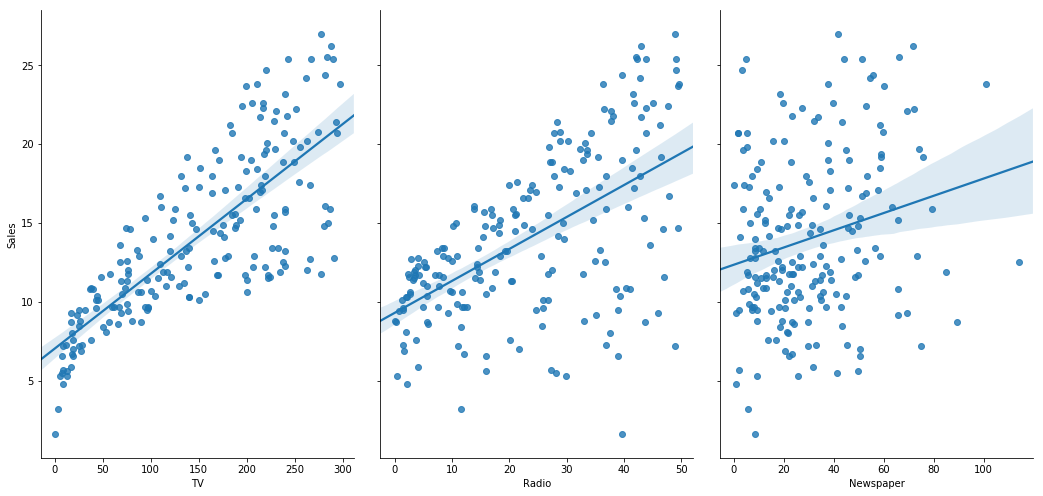

In [32]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

## Linear regression

**장점:** 빠르고, 하이퍼파라미터튜닝이 없고, 이해하기 쉬움
**단점:** 최고의 예측 정확도를 만들어내는 모델을 만들기가 어렵다. 규제 일반화 때문e)

### Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ 예측해야할 값
- $\beta_0$ 절편값
- $\beta_1$ 가중치 $x_1$ (첫번째 특성)
- $\beta_n$ 가중치 $x_n$ (n번째 특성)

In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$



## X값과 y값지정


In [45]:
# x값에 들어가야할 특성
feature_cols = ['TV', 'Radio', 'Newspaper']

# 리스트로 저장
X = data[feature_cols]

# 위와 동일한 코드
X = data[['TV', 'Radio', 'Newspaper']]

# print the first 5 rows
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [46]:
# X값의 특성은 3개
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [47]:
# 예측해야할 값? 매출!
y = data['Sales']

# 위와 동일한 데이터
y = data.Sales

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [48]:

print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


## 훈련데이터와 테스트데이터

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [50]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


## Linear regression

In [51]:
# 모델 import
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# 학습
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Interpreting model coefficients

In [52]:
# 절편과 가중치를 보고 싶다면?
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [53]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.04656456787415028),
 ('Radio', 0.17915812245088836),
 ('Newspaper', 0.0034504647111804412)]

$$y = 2.88 + 0.0466 \times TV + 0.179 \times Radio + 0.00345 \times Newspaper$$

- TV 가중치 0.0466이 뜻하는것?

- TV광고에 1000달러지출이 매출 46.6개와 관련있는뜻!
- 다시말해서..라디오와 뉴스에 광고지출이 같다면 TV에 1000달러를 더 지출하면 상품의 매출이 46.6개가 더 오른다는뜻!
- 만약 +가 아니라 -라면?

### 예측

In [54]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

## 모델 평가

- 분류문제에서는 정확도(몇개를 맞췄는지 숫자세기)면 되지만, 연속적인 실수를 예측하는 회귀문제는?

- 회귀문제에서 자주 쓰이는 3개의 모델 평가방법을 소개하겠다

In [55]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors: - 에러의 평균!

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [56]:
# calculate MAE by hand
print((10 + 0 + 20 + 10)/4.)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


**Mean Squared Error** (MSE) is the mean of the squared errors: - 많이 틀린에러에 패널티를 주는 방식!

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [57]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors: - 루트를 씌어서 y값과 해석이 쉽게!

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [58]:
# calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


### Computing the RMSE for our Sales predictions

In [59]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4046514230328955


## 특성선택

- 신문이 우리의 예측모델 질향상에 도움이 될까?
- 신문 특성을 지워 보는것은 어떨까?
- 지우기전과 RMSE로 비교해보자!


In [7]:
data["TVRadio"]= data['TV']*data["Radio"]

# create a Python list of feature names
feature_cols = ['TV', 'Radio', 'TVRadio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

NameError: name 'train_test_split' is not defined

신문을 지웠더니 RMSE가 감소! 다시말해 에러가 감소하여 모델성능이 더 좋아졌다는 뜻! RMSE값은 감소할수록 더 좋음